In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(
    r"C:\Users\Mangtay\Desktop\DataScience\MachineLearning\Datasets\9-email_classification_svm.csv"
)


In [3]:
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [4]:
#Kelimeler analiz edilmiş ne kadar formal dil diğeri de ne kadar yakınlıktan geliyor 0 ise personal 1 ise work e mail gelmiştir anlamında

In [5]:
df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.isnull().sum()

subject_formality_score      0
sender_relationship_score    0
email_type                   0
dtype: int64

<Axes: xlabel='subject_formality_score', ylabel='sender_relationship_score'>

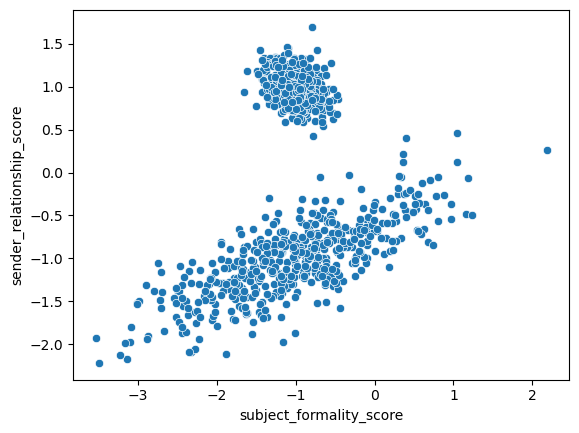

In [9]:
sns.scatterplot(x=df["subject_formality_score"],y=df["sender_relationship_score"] )

In [11]:
X= df.drop("email_type",axis=1)
y= df["email_type"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=0.25)

In [14]:
X_train

,subject_formality_score,sender_relationship_score
846,-1.076655,0.943601
969,-1.062554,1.148473
191,-0.904298,1.049447
711,-1.283609,-1.171544
967,-1.097239,1.388281
...,...,...
887,-1.153241,1.241387
645,-0.964472,1.235402
908,-0.862866,1.110327
757,-1.124572,0.967717


In [15]:
from sklearn.svm import SVC

In [17]:
svc = SVC(kernel="linear")

In [19]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
svc.coef_

array([[ 0.60318833, -1.91645213]])

In [22]:
y_pred =svc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [28]:
print(confusion_matrix(y_pred,y_test))

[[117   0]
 [  1 132]]


In [29]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   0]
 [  1 132]]


In [30]:
df = pd.read_csv(
    r"C:\Users\Mangtay\Desktop\DataScience\MachineLearning\Datasets\9-loan_risk_svm.csv"
)


In [31]:
df.head()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1


In [47]:
#credit_score_fluctuation  = dalgalanma kredi skoru
#recent_transaction_volume = işlemlerin hacimleri
# loan_risk müşteri riski ile ilgili 

<Axes: xlabel='credit_score_fluctuation', ylabel='recent_transaction_volume'>

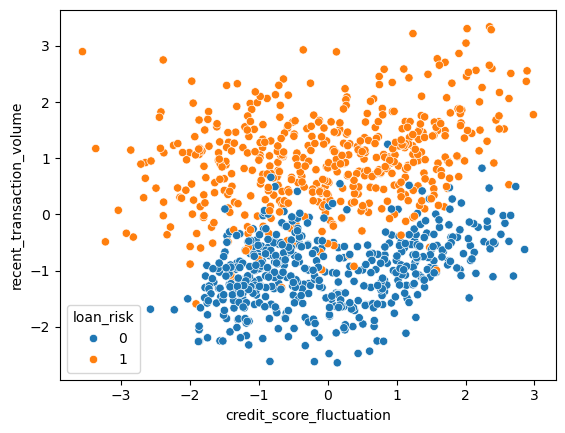

In [48]:
sns.scatterplot(x=df["credit_score_fluctuation"],y=df["recent_transaction_volume"], hue =df["loan_risk"])

In [54]:
X=df.drop('loan_risk',axis=1)
y=df['loan_risk']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [56]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
y_pred3=linear.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       121
           1       0.91      0.93      0.92       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[109  12]
 [  9 120]]


In [57]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred4=rbf.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       121
           1       0.94      0.91      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113   8]
 [ 11 118]]


In [58]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred5=poly.predict(X_test)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       121
           1       0.90      0.94      0.92       129

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107  14]
 [  8 121]]


In [59]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred6=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       121
           1       0.83      0.84      0.84       129

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 98  23]
 [ 20 109]]


In [60]:
#rbf seems to be the choice, let's to hyperparameter tuning

In [61]:
#Hyperparameter tuning performans arttırma muhabbeti

In [62]:
SVC()

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [84]:
params_grid = {
    "C" : [0.1,1,10,100,1000],
    "kernel" : ["rbf","linear","sigmoid"],
    "gamma" : ["scale","auto"],
}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid = GridSearchCV(estimator=SVC(),param_grid=params_grid,cv=5)

In [87]:
grid.fit(X_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [88]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [89]:
y_pred7=grid.predict(X_test)
print(classification_report(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       121
           1       0.93      0.92      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[112   9]
 [ 10 119]]


In [90]:
#Sismik aktivite dataseti

In [92]:
df = pd.read_csv(
    r"C:\Users\Mangtay\Desktop\DataScience\MachineLearning\Datasets\9-seismic_activity_svm.csv"
)


In [94]:
df.head() # deprem enerjisi titreşim enerjisi deprem oldu mu olmadı mı

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


<Axes: xlabel='underground_wave_energy', ylabel='vibration_axis_variation'>

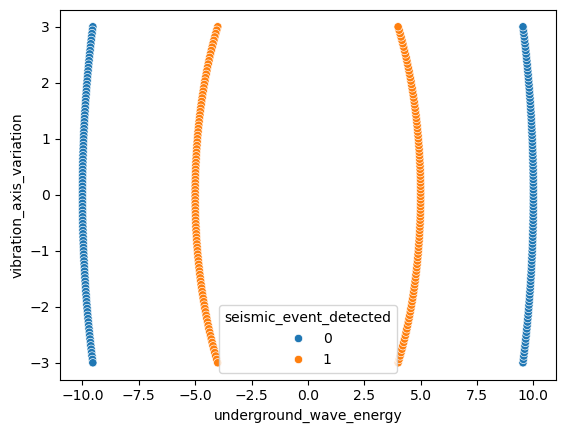

In [96]:
sns.scatterplot(x =df["underground_wave_energy"],y=df["vibration_axis_variation"],hue=df["seismic_event_detected"])

In [97]:
#nereden çizgi çizersem çizeyim sıkıntılı burada rbf kernel yapmamız gerekiyor 

In [98]:
df.columns

Index(['underground_wave_energy', 'vibration_axis_variation',
       'seismic_event_detected'],
      dtype='object')

In [100]:
df['underground_wave_energy **2']= df['underground_wave_energy']**2
df['vibration_axis_variation **2']= df['vibration_axis_variation']**2
df['underground_wave_energy*vibration_axis_variation'] = (df['underground_wave_energy'] *df['vibration_axis_variation'])
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
0,9.539392,-3.000000,0,91.000000,9.000000,-28.618176
1,9.558241,-2.939394,0,91.359963,8.640037,-28.095434
2,9.576669,-2.878788,0,91.712580,8.287420,-27.569197
3,9.594678,-2.818182,0,92.057851,7.942149,-27.039548
4,9.612272,-2.757576,0,92.395776,7.604224,-26.506569


In [101]:
X=df.drop('seismic_event_detected',axis=1)
y=df['seismic_event_detected']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [103]:
X_train

,underground_wave_energy,vibration_axis_variation,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
135,-9.961312,0.878788,99.227732,0.772268,-8.753880
170,-9.922519,-1.242424,98.456382,1.543618,12.327978
368,-4.872667,-1.121212,23.742883,1.257117,5.463293
77,9.860133,1.666667,97.222222,2.777778,16.433555
12,9.738311,-2.272727,94.834711,5.165289,-22.132526
...,...,...,...,...,...
384,-4.541817,-2.090909,20.628099,4.371901,9.496526
375,-4.755162,-1.545455,22.611570,2.388430,7.348887
133,-9.949874,1.000000,99.000000,1.000000,-9.949874
396,-4.130115,-2.818182,17.057851,7.942149,11.639415


In [104]:
import plotly.express as px

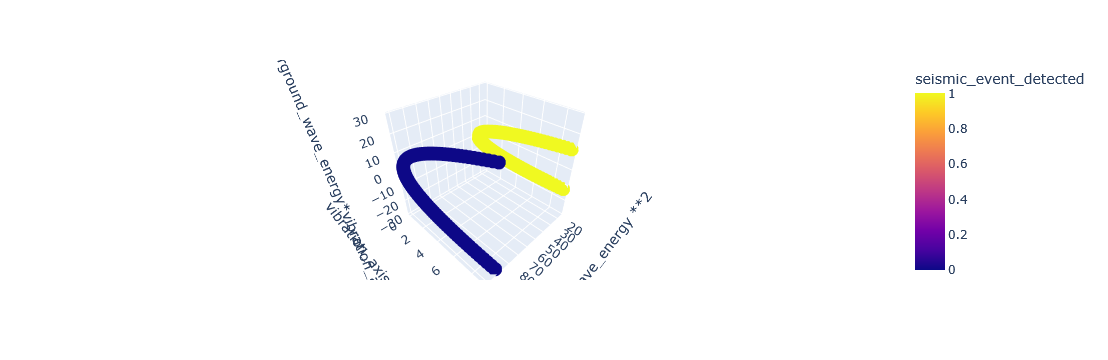

In [105]:
fig = px.scatter_3d(df, x='underground_wave_energy **2', y='vibration_axis_variation **2', z='underground_wave_energy*vibration_axis_variation',
              color='seismic_event_detected')
fig.show()

In [106]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
y_pred8=linear.predict(X_test)
print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]


In [107]:
df = pd.read_csv(
    r"C:\Users\Mangtay\Desktop\DataScience\MachineLearning\Datasets\9-seismic_activity_svm.csv"
)
X=df.drop('seismic_event_detected',axis=1)
y=df['seismic_event_detected']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [110]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
y_pred9=linear.predict(X_test)
print(classification_report(y_test,y_pred9))
print(confusion_matrix(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        48
           1       0.00      0.00      0.00        52

    accuracy                           0.48       100
   macro avg       0.24      0.50      0.32       100
weighted avg       0.23      0.48      0.31       100

[[48  0]
 [52  0]]


C:\Users\Mangtay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Mangtay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Mangtay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [111]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred11=rbf.predict(X_test)
print(classification_report(y_test,y_pred11))
print(confusion_matrix(y_test,y_pred11))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]
